In [2]:
pip install requests openpyxl pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install schedule

  Obtaining dependency information for schedule from https://files.pythonhosted.org/packages/20/a7/84c96b61fd13205f2cafbe263cdb2745965974bdf3e0078f121dfeca5f02/schedule-1.2.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [46]:
# import necessary libraries
import requests
import pandas as pd
import schedule
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Fetch live cryptocurrency data
print("Fetching live cryptocurrency data...")

Fetching live cryptocurrency data...


# Step 1: API endpoint and parameters

In [8]:
url = "https://api.coingecko.com/api/v3/coins/markets" # used coingecko as it is free and no authentication key required
params = {
    "vs_currency": "usd",  # Prices in USD
    "order": "market_cap_desc",  # Order by market capitalization
    "per_page": 50,  # Top 50 cryptocurrencies
    "page": 1,
    "sparkline": False  # No historical sparkline data
}

try:
    response = requests.get(url, params=params)
    response.raise_for_status()  # Raise an error if the request fails
    data = response.json()  # Parse the JSON response
    df = pd.DataFrame(data)  # Convert the data into a pandas DataFrame
    print("Data fetched successfully.")
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
    df = None

Data fetched successfully.


# Step 2: Analyze the data

In [14]:
# Find the top 5 cryptocurrencies by market cap
top_5 = df.nlargest(5, 'market_cap')
top_5

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,96936.000,1916689917818,1,2034367519484,92444442828,96971.000,...,2.100000e+07,21000000.0,96971.00,-0.46755,2024-11-21T04:15:44.762Z,67.810000,1.422381e+05,2013-07-06T00:00:00.000Z,None,2024-11-21T04:53:57.707Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,3134.790,377670267659,2,377670267659,34216696002,3150.170,...,1.204275e+08,NaN,4878.26,-35.90765,2021-11-10T14:24:19.604Z,0.432979,7.220119e+05,2015-10-20T00:00:00.000Z,"{'times': 42.23616022893601, 'currency': 'btc'...",2024-11-21T04:53:58.191Z
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.001,130400176332,3,130400176332,60069321161,1.005,...,1.301511e+11,NaN,1.32,-24.33477,2018-07-24T00:00:00.000Z,0.572521,7.486225e+01,2015-03-02T00:00:00.000Z,None,2024-11-21T04:53:55.562Z
3,solana,sol,Solana,https://coin-images.coingecko.com/coins/images...,240.630,114365678232,4,141849520516,9307416053,241.950,...,5.886612e+08,NaN,259.96,-7.40967,2021-11-06T21:54:35.825Z,0.500801,4.796241e+04,2020-05-11T19:35:23.449Z,None,2024-11-21T04:53:53.839Z
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,609.960,88940993569,5,88940993569,1729973640,619.240,...,1.458876e+08,200000000.0,717.48,-15.53952,2024-06-06T14:10:59.816Z,0.039818,1.521794e+06,2017-10-19T00:00:00.000Z,None,2024-11-21T04:53:57.712Z


In [16]:
# Calculate the average price of the top 50 cryptocurrencies
avg_price = df['current_price'].mean()
avg_price

4240.7583859356

In [18]:
# Find the highest and lowest percentage price changes in 24 hours
max_change = df['price_change_percentage_24h'].max()
max_change

11.27945

In [19]:
min_change = df['price_change_percentage_24h'].min()
min_change

-8.79811

In [22]:
 # Print the analysis results
print("\nAnalysis Results:")
print("Top 5 Cryptocurrencies by Market Cap:")
print(top_5[['name', 'current_price', 'market_cap']])
print(f"Average Price of Top 50 Cryptocurrencies: ${avg_price:.2f}")
print(f"Highest 24h Change: {max_change:.2f}%")
print(f"Lowest 24h Change: {min_change:.2f}%")


Analysis Results:
Top 5 Cryptocurrencies by Market Cap:
       name  current_price     market_cap
0   Bitcoin      96936.000  1916689917818
1  Ethereum       3134.790   377670267659
2    Tether          1.001   130400176332
3    Solana        240.630   114365678232
4       BNB        609.960    88940993569
Average Price of Top 50 Cryptocurrencies: $4240.76
Highest 24h Change: 11.28%
Lowest 24h Change: -8.80%


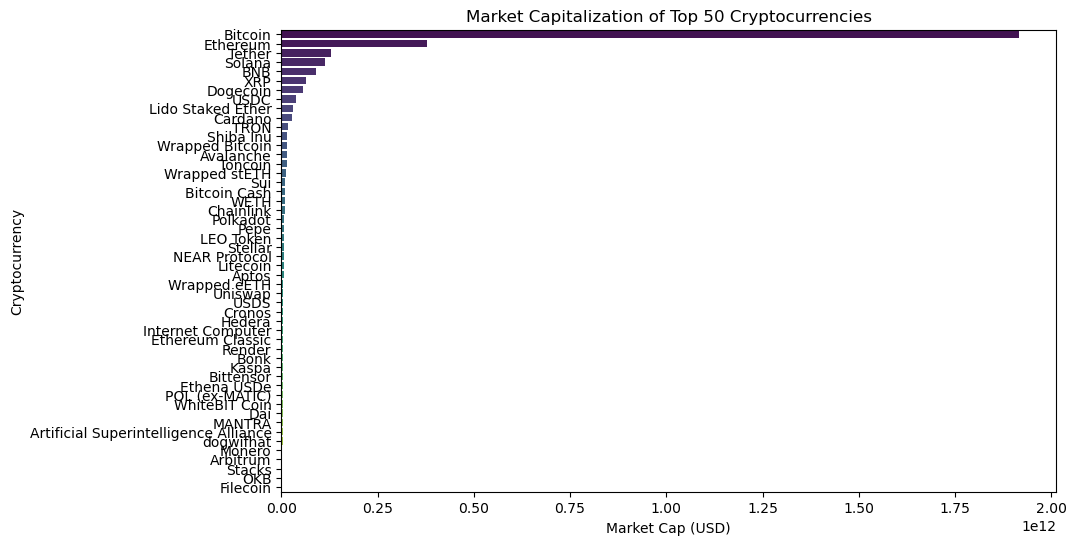

In [48]:
# plotting visualization for better understanding of data
plt.figure(figsize=(10, 6))
sns.barplot(x='market_cap', y='name', data=df, palette='viridis')
plt.title('Market Capitalization of Top 50 Cryptocurrencies')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Cryptocurrency')
plt.show()

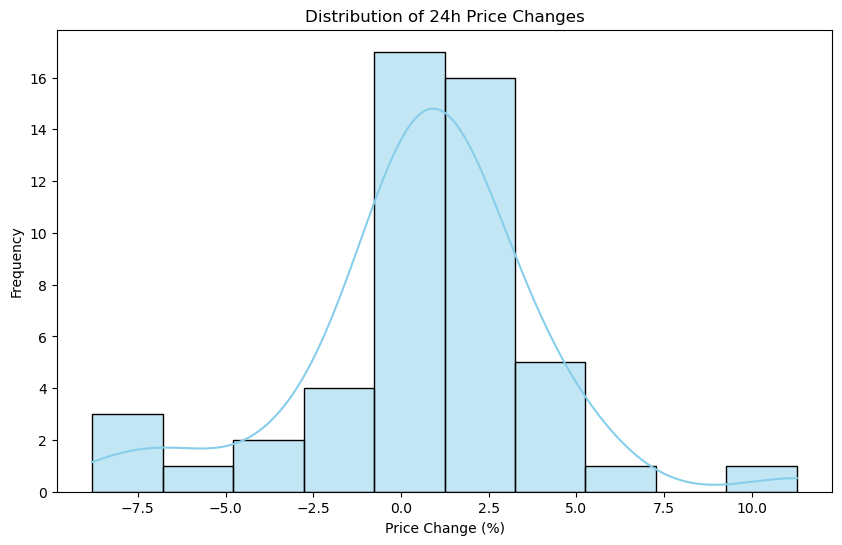

In [49]:
# Price Change Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price_change_percentage_24h'], kde=True, color='skyblue', bins=10)
plt.title('Distribution of 24h Price Changes')
plt.xlabel('Price Change (%)')
plt.ylabel('Frequency')
plt.show()

# Step 3: Save the data to an Excel file

In [44]:
# Save the DataFrame to an Excel file
df.to_excel("crypto_live_data.xlsx", index=False)

print("Data has been written to 'crypto_live_data.xlsx'. Open the file in Excel to view the data.")

Data has been written to 'crypto_live_data.xlsx'. Open the file in Excel to view the data.
